In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
seed(2022)

# Test function

In [2]:
import project1; import importlib; importlib.reload(project1); from project1.project1 import make_design_matrix
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
X = make_design_matrix(xvec, p=3)

In [3]:
from itertools import combinations_with_replacement
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
xi = {"x%i"%i : xvec[i].ravel() for i in range(len(xvec))}
keys = [key for key in xi.keys()]
comb = []
p = 2
for p in range(1,p+1):
    comb += [x for x in combinations_with_replacement(keys, p )]
print(comb)
X = make_design_matrix(xvec, p=5)
print(X)

[('x0',), ('x1',), ('x0', 'x0'), ('x0', 'x1'), ('x1', 'x1')]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 2.50000000e-01 0.00000000e+00 6.25000000e-02
  0.00000000e+00 0.00000000e+00 1.56250000e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.90625000e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.76562500e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 5.00000000e-01 0.00000000e+00 2.50000000e-01
  0.00000000e+00 0.00000000e+00 1.25000000e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 6.25000000e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.12500000e-02
  0.00000000e+00 0.00000000e+00 0.0

In [4]:
def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
X_lecturer = create_X(x = x, y = y, n = 5)
np.sum(X_lecturer == X) == len(X.ravel())

True

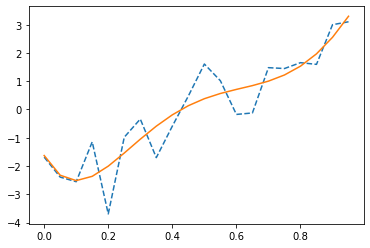

In [5]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
def test_func(**kwargs):
    x = kwargs['x0']
    return 5*x**2 + x

xvec  = np.array([x])
X = make_design_matrix(xvec = xvec, p = 5)
z = test_func(**{'x0':x})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = np.array([[x] for x in znoisy - np.mean(znoisy)])
A = np.linalg.pinv(X.T@X)@X.T
betahat = A@znoisy_centered
znoisy_tilde = X@betahat
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)

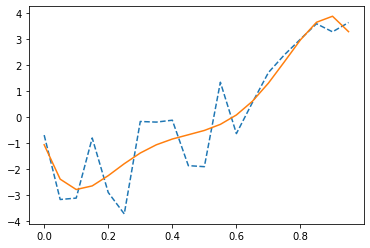

In [7]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
xvec = np.array([x])
z = test_func(**{'x0':x})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = znoisy - np.mean(znoisy)
X = make_design_matrix(xvec = xvec, p = 5)
znoisy_tilde, betahat = ols_fp_wo_split(X = X, y = znoisy_centered)
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)


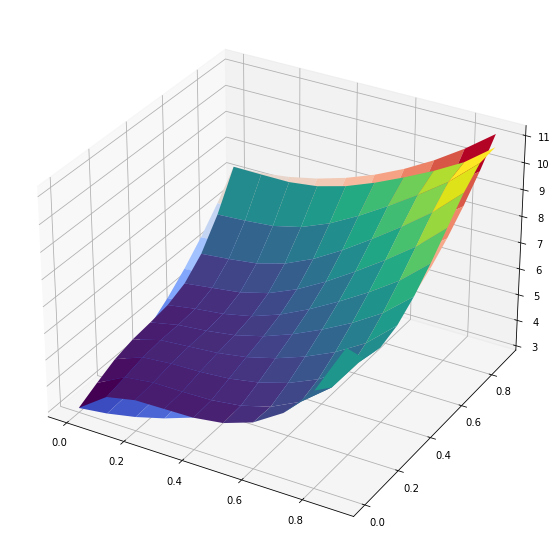

In [9]:
%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x, y = np.arange(0,1,0.1), np.arange(0,1,0.1)
x, y = np.meshgrid(x,y)
def test_func_2(**kwargs):
    x = kwargs['x0']
    y = kwargs['x1']
    return 5*x**2 + x + 5*y**2 + y + np.exp(-x**2) +np.exp(-x*y) + np.exp(-y) 
xvec = np.array([x, y])
X = make_design_matrix(xvec = xvec, p = 5)
z = test_func_2(**{'x%i'%i: xvec[i] for i in range(len(xvec))})

noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = znoisy - np.mean(znoisy)
znoisy_tilde, betahat = ols_fp_wo_split(X = X, y = znoisy_centered.ravel())
znoisy_tilde = znoisy_tilde.reshape(x.shape)
znoisy = znoisy.reshape(x.shape)


fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde + np.mean(znoisy), cmap=cm.viridis)
ax.plot_surface(x,y,z, cmap=cm.coolwarm)

# b)

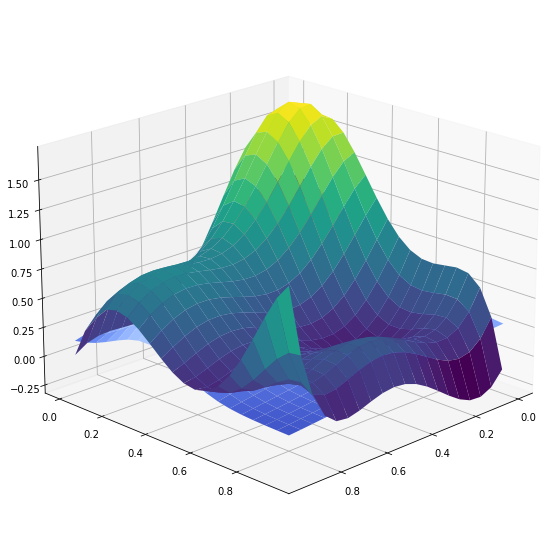

In [12]:
%matplotlib inline
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = znoisy - np.mean(znoisy)
for p in range(1,6):
    X = make_design_matrix(xvec = xvec, p = p)
    znoisy_tilde, betahat = ols_fp_wo_split(X = X, y = znoisy_centered.ravel())
znoisy_tilde = (znoisy_tilde + np.mean(znoisy)).reshape(x.shape)

fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde, cmap=cm.viridis)
ax.plot_surface(x,y,z, cmap=cm.coolwarm)
ax.view_init(20,45)

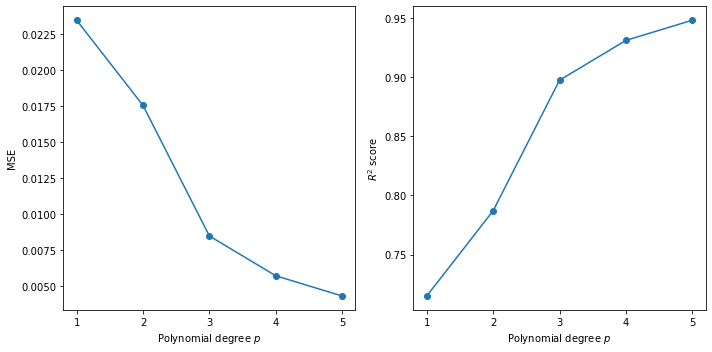

In [13]:
%matplotlib inline
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
xvec = np.array([x,y])

mses = np.zeros((5))
Rs = np.zeros((5))
betas = []
z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = znoisy - np.mean(znoisy)
for p in range(1,6):
    X = make_design_matrix(xvec = xvec, p = p)
    znoisy_tilde, betahat = ols_fp_wo_split(X = X, y = znoisy_centered)
    
    mses[p-1] = MSE(y = z,ytilde = znoisy_tilde + np.mean(znoisy))
    Rs[p-1] = Rscore(y = z, ytilde = znoisy_tilde+ np.mean(znoisy))
    betas.append(betahat)

fig, axs = plt.subplots(1,2, figsize=(10,5))
polydeg = np.arange(5)+1
axs[0].plot(polydeg, mses, marker='o')
axs[0].set_ylabel("MSE")
axs[1].plot(polydeg, Rs, marker='o')
axs[1].set_ylabel("$R^2$ score")
[ax.set_xlabel("Polynomial degree $p$") for ax in axs]
[ax.set_xticks(polydeg, polydeg) for ax in axs]
fig.tight_layout()

([<matplotlib.axis.XTick at 0x7f86bd6fbe20>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

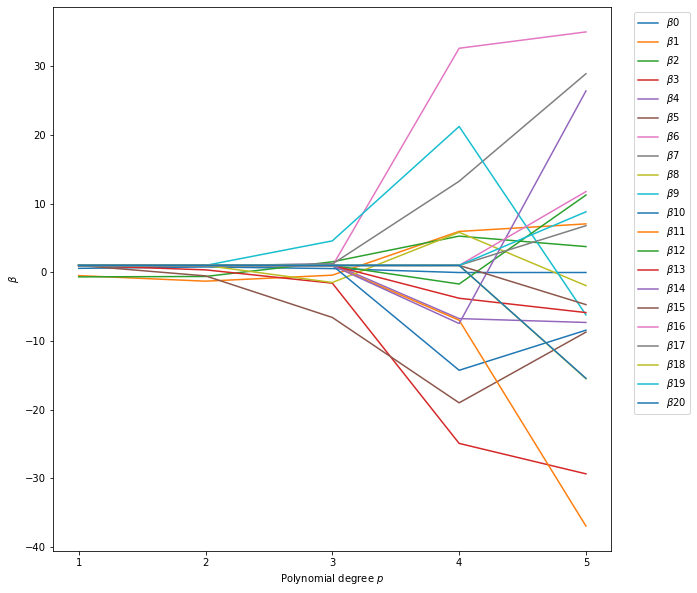

In [14]:
%matplotlib inline
beta_matrix = np.ones((5, len(betas[-1])))
plt.figure(figsize=(10,10))
for i in range(5):
    for j in range(len(betas[i])):
        beta_matrix[i,j] = betas[i][j]
[plt.plot(np.arange(5) + 1, beta_matrix[:,i], label="$\\beta%i$"%i) for i in range(beta_matrix.shape[-1])]
plt.ylabel("$\\beta$")
plt.xlabel("Polynomial degree $p$")
plt.legend(bbox_to_anchor=(1,.5,.15,.5))
plt.xticks(np.arange(5) + 1,np.arange(5) + 1)

# c)

To plot surface data retrieve the indices from the uniqueness of the xy-coordinates.

[None, None, None, None]

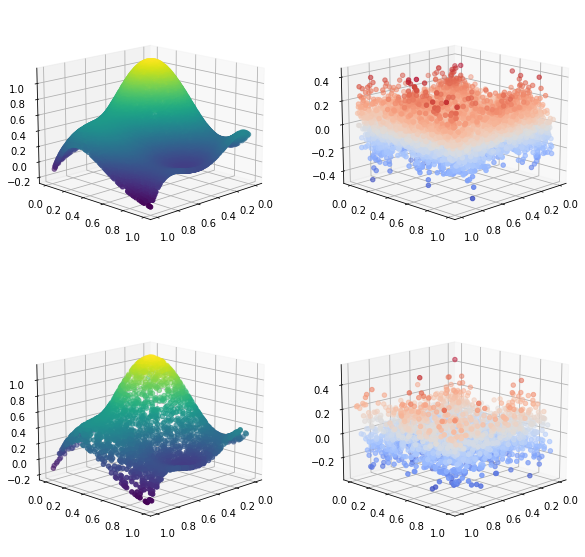

In [15]:
%matplotlib inline
from sklearn.model_selection import train_test_split
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
xvec = np.array([x,y])
X = make_design_matrix(xvec = xvec, p = 4)
z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,.1,size=z.shape)
znoisy = z + noise
ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                          **{"test_size" : 0.25, 
                                                                                             "random_state" : 42})
xtrain = Xtrain[:,1]
ytrain = Xtrain[:,2]
shape_train = (x.shape[0], len(ytrain)//x.shape[0])
xtest = Xtest[:,1]
ytest = Xtest[:,2]
shape_test = (x.shape[0], len(ytest)//x.shape[0])

fig, axs = plt.subplots(2,2,subplot_kw={'projection':'3d'}, figsize=(10,10))
axs[0,0].scatter(xtrain, ytrain, ztilde_train, c=ztilde_train, cmap=cm.viridis)
#axs[0].scatter(xtrain, ytrain, ztrain, c=ztrain, cmap=cm.coolwarm)
axs[0,1].scatter(xtrain, ytrain, np.mean(z)+ztrain-ztilde_train, c=np.mean(z)+ztrain-ztilde_train, cmap=cm.coolwarm)

axs[1,0].scatter(xtest, ytest, ztilde_test, c=ztilde_test, cmap=cm.viridis)
#axs[1].scatter(xtest, ytest, ztest, c=ztest, cmap=cm.coolwarm)
axs[1,1].scatter(xtest, ytest, ztest + np.mean(z)-ztilde_test, c=np.mean(z)+ztest-ztilde_test, cmap=cm.coolwarm)
[ax.view_init(15,45) for ax in axs.ravel()]

# Bias-variance trade-off

### 1D test case


In [16]:
def test_func_exp(**kwargs):
    x = kwargs['x0']
    return np.exp(x -x**2) + 5*x**2 + x

In [20]:
model_complexity = 20
mses_train, Rs_train = np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test = np.zeros((model_complexity)), np.zeros((model_complexity))
x = np.arange(0,1,0.05)
xvec = np.array([x])
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = test_func_exp(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.25, 
                                                                                                "random_state" : 21})
    mses_train[p-1] = MSE(y = ztrain+np.mean(znoisy),ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain+np.mean(znoisy), ytilde = ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest+np.mean(znoisy),ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest+np.mean(znoisy), ytilde = ztilde_test)

In [21]:
np.mean(noise)

-0.006153467662870521

([<matplotlib.axis.XTick at 0x7f86d164f340>,
 [Text(1, 0, '1'),
  Text(3, 0, '3'),
  Text(5, 0, '5'),
  Text(7, 0, '7'),
  Text(9, 0, '9'),
  Text(11, 0, '11'),
  Text(13, 0, '13'),
  Text(15, 0, '15'),
  Text(17, 0, '17'),
  Text(19, 0, '19')])

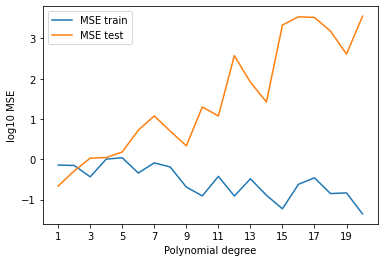

In [22]:
%matplotlib inline
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.legend()
plt.ylabel("log10 MSE")
plt.xlabel("Polynomial degree")
plt.xticks(np.arange(20)[::2]+1,np.arange(20)[::2]+1)

## 2D Test case

In [33]:
model_complexity = 20
mses_train, Rs_train = np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test = np.zeros((model_complexity)), np.zeros((model_complexity))
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = test_func_2(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.25, 
                                                                                                "random_state" : 21})
    mses_train[p-1] = MSE(y = ztrain+np.mean(z),ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain+np.mean(z), ytilde = ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest+np.mean(z),ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest+np.mean(z), ytilde = ztilde_test)

Text(0.5, 0, 'Polynomial degree')

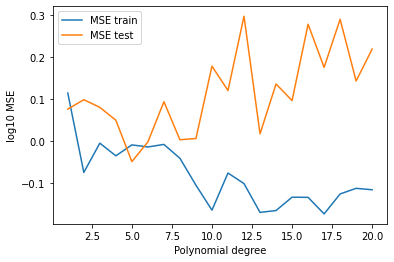

In [34]:
%matplotlib inline
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.legend()
plt.ylabel("log10 MSE")
plt.xlabel("Polynomial degree")

In [ ]:
#fig, axs = plt.subplots(1,2,subplot_kw={'projection':'3d'}, figsize=(10,10))
#axs[0].scatter(xtrain, ytrain, ztrain-ztilde_train, c=ztrain-ztilde_train, cmap=cm.coolwarm)
#axs[1].scatter(xtest, ytest, ztest-ztilde_test, c=ztest-ztilde_test, cmap=cm.coolwarm)
#[ax.view_init(0,45) for ax in axs]

# Bias-variance trade-off Franke function

In [35]:
model_complexity = 20
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
mses_train, Rs_train, bias_train, variance_train = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test, bias_test, variance_test = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity)), np.zeros((model_complexity))
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.25, 
                                                                                                "random_state" : 42})
    
    mses_train[p-1] = MSE(y = ztrain + np.mean(z),ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain + np.mean(z), ytilde = ztilde_train)
    bias_train[p-1] = np.mean((ztrain-np.mean(ztilde_train))**2)
    variance_train[p-1] = np.var(ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest + np.mean(z),ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest + np.mean(z), ytilde = ztilde_test)
    bias_test[p-1] = np.mean((ztest-np.mean(ztilde_test))**2)
    variance_test[p-1] = np.var(ztilde_test)

Text(0.5, 0, 'Polynomial degree')

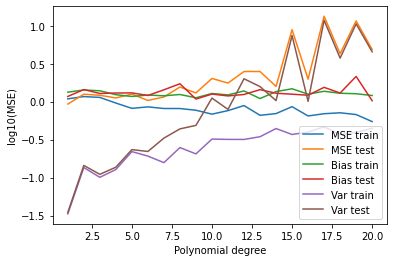

In [36]:
%matplotlib inline
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.plot(ps, np.log10(bias_train), label="Bias train")
plt.plot(ps, np.log10(bias_test), label="Bias test")
plt.plot(ps, np.log10(variance_train), label="Var train")
plt.plot(ps, np.log10(variance_test), label="Var test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

# Bootstrap

In [38]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 20
k = 1000
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
mses_train, Rs_train, bias_train, variance_train = np.zeros((model_complexity, k)), np.zeros((model_complexity,k)),np.zeros((model_complexity, k)), np.zeros((model_complexity,k))
mses_test, Rs_test, bias_test, variance_test = np.zeros((model_complexity, k)), np.zeros((model_complexity, k)),np.zeros((model_complexity, k)), np.zeros((model_complexity, k))
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = z_resampled, 
                                                                                                  **{"test_size" : 0.25, 
                                                                                                    "random_state" : 42})
    for ik in range(k):
        z_resampled = resample(data = znoisy)
        
        mses_train[p-1, ik] = MSE(y = ztrain + np.mean(z),ytilde = ztilde_train)
        Rs_train[p-1, ik] = Rscore(y = ztrain + np.mean(z), ytilde = ztilde_train)
        bias_train[p-1, ik] = np.mean((ztrain-np.mean(ztilde_train))**2)
        variance_train[p-1, ik] = np.var(ztilde_train)

        mses_test[p-1, ik] = MSE(y = ztest + np.mean(z),ytilde = ztilde_test)
        Rs_test[p-1, ik] = Rscore(y = ztest + np.mean(z), ytilde = ztilde_test)
        bias_test[p-1, ik] = np.mean((ztest-np.mean(ztilde_test))**2)
        variance_test[p-1, ik] = np.var(ztilde_test)

Text(0.5, 0, 'Polynomial degree')

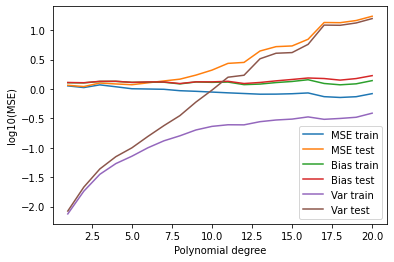

In [39]:
%matplotlib inline
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(np.mean(mses_train, axis = 1)), label="MSE train")
plt.plot(ps, np.log10(np.mean(mses_test, axis = 1)), label="MSE test")
plt.plot(ps, np.log10(np.mean(bias_train, axis = 1)), label="Bias train")
plt.plot(ps, np.log10(np.mean(bias_test, axis = 1)), label="Bias test")
plt.plot(ps, np.log10(np.mean(variance_train, axis = 1)), label="Var train")
plt.plot(ps, np.log10(np.mean(variance_test, axis = 1)), label="Var test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

# d) cross validation

In [40]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 20
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
k = 5
mses_train, var_train, bias_train, variance_train = np.zeros((model_complexity, k)), np.zeros((model_complexity,k)),np.zeros((model_complexity, k)), np.zeros((model_complexity,k))
mses_test, var_test, bias_test, variance_test = np.zeros((model_complexity, k)), np.zeros((model_complexity, k)),np.zeros((model_complexity, k)), np.zeros((model_complexity, k))
for p in range(1,model_complexity+1):
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    mses_train[p-1], mses_test[p-1], bias_train[p-1], bias_test[p-1], var_train[p-1], var_test[p-1] = cross_validation(data = znoisy, xvec = xvec, k = k, p = p, method = "ols")


Text(0.5, 0, 'Polynomial degree')

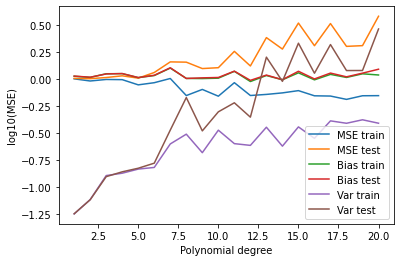

In [41]:
%matplotlib inline
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(np.mean(mses_train, axis = 1)), label="MSE train")
plt.plot(ps, np.log10(np.mean(mses_test, axis = 1)), label="MSE test")
plt.plot(ps, np.log10(np.mean(bias_train, axis = 1)), label="Bias train")
plt.plot(ps, np.log10(np.mean(bias_test, axis = 1)), label="Bias test")
plt.plot(ps, np.log10(np.mean(var_train, axis = 1)), label="Var train")
plt.plot(ps, np.log10(np.mean(var_test, axis = 1)), label="Var test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

# e)

In [63]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
model_complexity = 10
lambdas = np.logspace(-15,7, 100)

mses_train, Rs_train = np.zeros((model_complexity, len(lambdas))), np.zeros((model_complexity,len(lambdas)))
mses_test, Rs_test = np.zeros((model_complexity,len(lambdas))), np.zeros((model_complexity,len(lambdas)))
for p in range(1, model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise

    for i in range(len(lambdas)):
        lmbda = lambdas[i]
        ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ridge_fp_train_test_split(X = X, 
                                                                                                    y = znoisy, 
                                                                                                    lmbda = lmbda, 
                                                                                                  **{"test_size" : 0.3, 
                                                                                                    "random_state" : 42})
        #print(lmbda, Xtrain.shape, Xtest.shape)
        mses_train[p-1, i] = MSE(y = ztrain,ytilde = ztilde_train)
        Rs_train[p-1, i] = Rscore(y = ztrain, ytilde = ztilde_train)

        mses_test[p-1, i] = MSE(y = ztest,ytilde = ztilde_test)
        Rs_test[p-1, i] = Rscore(y = ztest, ytilde = ztilde_test)

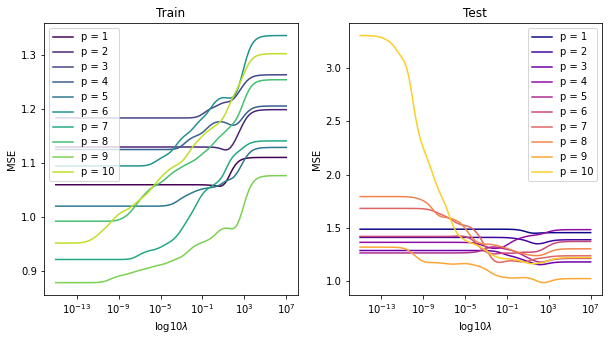

In [64]:
carr = np.arange(mses_train.shape[0])/mses_train.shape[0]
cs_train = plt.cm.viridis(carr)
cs_test = plt.cm.plasma(carr)
fig, axs = plt.subplots(1,2, figsize=(10,5))
for ip in range(mses_train.shape[0]):
    axs[0].plot(lambdas, mses_train[ip], color = cs_train[ip], label="p = %i"%(ip+1))
    axs[1].plot(lambdas, mses_test[ip], color = cs_test[ip], label="p = %i"%(ip+1))
axs[0].set_title("Train")
axs[1].set_title("Test")

[ax.set_xscale('log') for ax in axs]
[ax.set_ylabel("MSE") for ax in axs]
[ax.set_xlabel("log10$\\lambda$") for ax in axs]
[ax.legend() for ax in axs]

# f)

## with bootstrapping

In [85]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 20
k = int(1e3)
x, y = np.meshgrid(np.arange(0,1,0.105),np.arange(0,1,0.105))
xvec = np.array([x,y])
lambdas = np.logspace(-6,4, 100)

mses_train, var_train, bias_train = np.zeros((model_complexity,len(lambdas), k)), np.zeros((model_complexity,len(lambdas),k)),np.zeros((model_complexity, len(lambdas),k)) 
mses_test, var_test, bias_test = np.zeros((model_complexity,len(lambdas), k)), np.zeros((model_complexity, len(lambdas), k)),np.zeros((model_complexity,len(lambdas), k))
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    Xtrain, Xtest, ztrain, ztest = train_test_split(X, znoisy)
    for i in range(len(lambdas)):
            z_resampled = resample(data = ztrain)
            ztilde_train, betahat = ridge_fp_wo_split(X=Xtrain, y=ztrain-np.mean(ztrain), lmbda = lambdas[i])
            ztilde_train += np.mean(ztrain)
            ztilde_test = Xtest@betahat + np.mean(ztrain)
            mses_train[p-1, i, ik] = MSE(y = ztrain ,ytilde = ztilde_train)
            bias_train[p-1, i, ik] = np.mean((ztrain-np.mean(ztilde_train))**2)
            var_train[p-1, i, ik] = np.var(ztilde_train)

            mses_test[p-1, i, ik] = MSE(y = ztest,ytilde = ztilde_test)
            bias_test[p-1, i, ik] = np.mean((ztest-np.mean(ztilde_test))**2)
            var_test[p-1, i, ik] = np.var(ztilde_test)

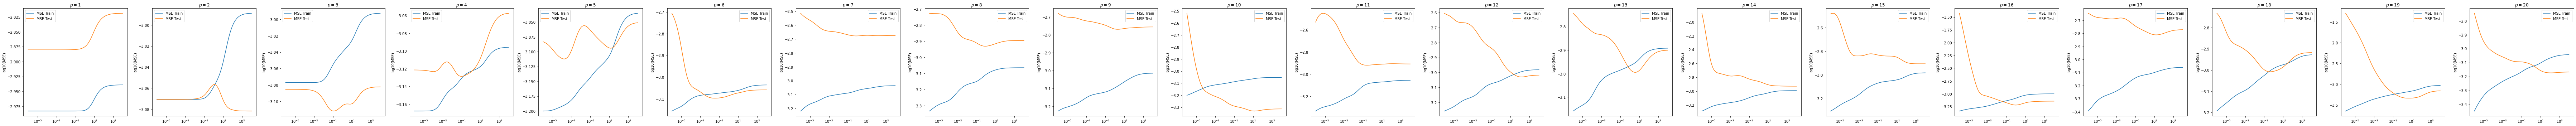

In [86]:
fig, axs = plt.subplots(1,model_complexity,figsize=(model_complexity*5,5))
for p in range(model_complexity):
    axs[p].set_title("$p = %i$"%(p+1))
    axs[p].plot(lambdas, np.log10(np.mean(mses_train[p], axis=1)), label="MSE Train")
    axs[p].plot(lambdas, np.log10(np.mean(mses_test[p], axis=1)), label="MSE Test") 
    #axs[p].plot(lambdas, np.log10(np.mean(bias_train[p], axis=1)), label="Bias Train")
    #axs[p].plot(lambdas, np.log10(np.mean(bias_test[p], axis=1)), label="Bias Test") 
    #axs[p].plot(lambdas, np.log10(np.mean(var_train[p], axis=1)), label="$\\sigma^2$ Train")
    #axs[p].plot(lambdas, np.log10(np.mean(var_test[p], axis=1)), label="$\\sigma^2$ Test") 
[ax.set_xscale('log') for ax in axs]
[ax.legend() for ax in axs]
[ax.set_ylabel("log10(MSE)") for ax in axs]
fig.tight_layout()

## with cross-validation

In [ ]:
from sklearn import linear_model
import project1.project1; import importlib; importlib.reload(project1.project1); from project1.project1 import *
model_complexity = 5
k=5
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
xvec = np.array([x,y])
lambdas = np.logspace(-5,5, 100)

mses_train, var_train, bias_train, variance_train = np.zeros((model_complexity,len(lambdas), k)), np.zeros((model_complexity,len(lambdas),k)),np.zeros((model_complexity, len(lambdas),k)), np.zeros((model_complexity,len(lambdas),k))
mses_test, var_test, bias_test, variance_test = np.zeros((model_complexity,len(lambdas), k)), np.zeros((model_complexity, len(lambdas), k)),np.zeros((model_complexity,len(lambdas), k)), np.zeros((model_complexity, len(lambdas),k))

for p in range(1, model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    for i in range(len(lambdas)):
        mses_train[p-1,i], mses_test[p-1,i], bias_train[p-1,i], bias_test[p-1,i], var_train[p-1,i], var_test[p-1,i] = cross_validation(data = znoisy, xvec = xvec, k = k, p = p, method = "ridge", lmbda = lambdas[i])

In [ ]:
fig, axs = plt.subplots(1,model_complexity,figsize=(model_complexity*5,5), sharey=True)
for p in range(model_complexity):
    axs[p].set_title("$p=%i$"%(p+1))
    axs[p].plot(lambdas, np.log10(np.mean(mses_train[p], axis=1)), label="Train")
    axs[p].plot(lambdas, np.log10(np.mean(mses_test[p], axis=1)), label="Test") 
[ax.set_xscale('log') for ax in axs]
[ax.legend() for ax in axs]
axs[0].set_ylabel("log10(MSE)")

# Real data 
# g)

### plot example

[None, None]

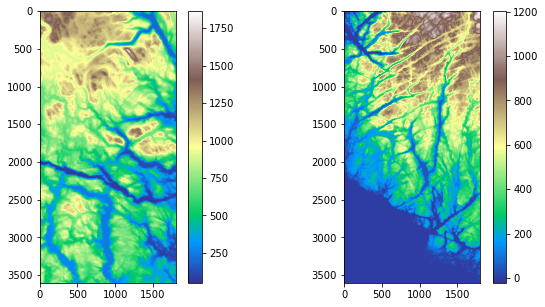

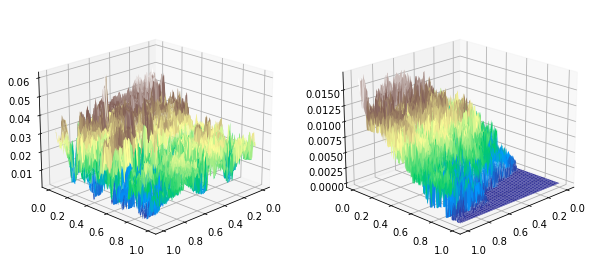

In [51]:
from imageio import imread
datadir = "~/cs/ada_ml/ada_ml_project1/datafiles"
terrain1 = np.array(imread(datadir + "/SRTM_data_Norway_1.tif"))
terrain2 = np.array(imread(datadir + "/SRTM_data_Norway_2.tif"))
fig, axs = plt.subplots(1,2, figsize = (10,5))
fig_3d, axs_3d = plt.subplots(1,2, subplot_kw={'projection':'3d'}, figsize = (10,5))
im1 = axs[0].imshow(terrain1, cmap = plt.cm.terrain)
im2 = axs[1].imshow(terrain2, cmap = plt.cm.terrain)
cbar1 = fig.colorbar(im1, ax = axs[0])
cbar2 = fig.colorbar(im2, ax = axs[1])
x1, y1 = np.meshgrid(np.linspace(0,1, terrain1.shape[1]), np.linspace(0,1, terrain1.shape[0]) )
x2, y2 = np.meshgrid(np.linspace(0,1, terrain2.shape[1]), np.linspace(0,1, terrain2.shape[0]) )
axs_3d[0].plot_surface(x1, y1, terrain1/np.sqrt(np.sum(terrain1**2)), cmap =plt.cm.terrain)
axs_3d[1].plot_surface(x2, y2, terrain2/np.sqrt(np.sum(terrain2**2)), cmap =plt.cm.terrain)
[ax.view_init(20,45) for ax in axs_3d]

## Bias-variance trade-off analysis
1. OLS
2. Ridge
3. Lasso

with bootstrap and cross-validation in order to make a full comparison

# Time for generating design matrices

In [110]:
import time
model_complexity = 5
xvec = np.array([x,y])
for p in range(1,model_complexity+1):

    tik = time.time()
    X = make_design_matrix(xvec = xvec, p = p)
    #X = create_X(x = x1, y=y1, n = p)
    tok = time.time()
    print(tok-tik)

0.026012659072875977
0.05885434150695801
0.11849808692932129
0.2149364948272705
0.35573315620422363


In [109]:
import time
model_complexity = 5
xvec = np.array([x1,y1])
for p in range(1,model_complexity+1):
    tik = time.time()
    #X = make_design_matrix(xvec = xvec, p = p)
    X = create_X(x = x, y=y, n = p)
    tok = time.time()
    print(tok-tik)

0.00027751922607421875
0.0007750988006591797
0.001661062240600586
0.0035965442657470703
0.007300615310668945


### OLS bootstrap

In [114]:
terrain1.shape[0]*terrain1.shape[1]

6485401

In [113]:
X = create_X(x = x1, y=y1, n = 3)
X.shape


(6485401, 10)

In [111]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 5
k = int(10)
xvec = np.array([x1,y1])

mses_train, var_train, bias_train = np.zeros((model_complexity, k)), np.zeros((model_complexity,k)),np.zeros((model_complexity,k)) 
mses_test, var_test, bias_test = np.zeros((model_complexity, k)), np.zeros((model_complexity, k)),np.zeros((model_complexity, k))
for p in range(1,model_complexity+1):
    print(p)
    #X = make_design_matrix(xvec = xvec, p = p)
    X = create_X(x = x1, y=y1, n = p)
    Xtrain, Xtest, ztrain, ztest = train_test_split(X, terrain1)
    for ik in range(k):
        z_resampled = resample(data = ztest)
        ztilde_train, betahat = ols_fp_wo_split(X=Xtrain, y=z_resampled-np.mean(z_resampled))
        ztilde_train += np.mean(z_resampled)
        ztilde_test = Xtest@betahat + np.mean(z_resampled)
        mses_train[p-1, ik] = MSE(y = ztrain ,ytilde = ztilde_train)
        bias_train[p-1, ik] = np.mean((ztrain-np.mean(ztilde_train))**2)
        var_train[p-1, ik] = np.var(ztilde_train)

        mses_test[p-1,ik] = MSE(y = ztest ,ytilde = ztilde_test)
        bias_test[p-1,ik] = np.mean((ztest-np.mean(ztilde_test))**2)
        var_test[p-1, ik] = np.var(ztilde_test)

1


ValueError: Found input variables with inconsistent numbers of samples: [6485401, 3601]

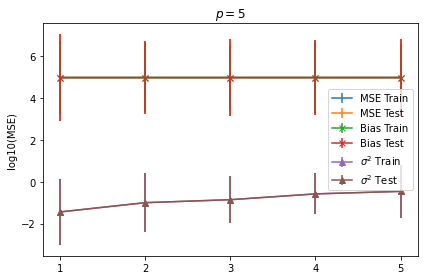

In [62]:
fig, ax = plt.subplots(1,1)
ps = np.arange(model_complexity)+1
ax.set_title("$p = %i$"%(model_complexity))
ax.errorbar(ps, np.log10(np.mean(mses_train, axis=1)),yerr=np.log10(np.std(mses_train, axis=1)), label="MSE Train")
ax.errorbar(ps, np.log10(np.mean(mses_test, axis=1)), yerr=np.log10(np.std(mses_test, axis=1)),  label="MSE Test" ) 
ax.errorbar(ps, np.log10(np.mean(bias_train, axis=1)),yerr=np.log10(np.std(bias_train, axis=1)), label="Bias Train",        marker = 'x')
ax.errorbar(ps, np.log10(np.mean(bias_test, axis=1)), yerr=np.log10(np.std(bias_test, axis=1)),  label="Bias Test",         marker = 'x') 
ax.errorbar(ps, np.log10(np.mean(var_train, axis=1)), yerr=np.log10(np.std(var_train, axis=1)),  label="$\\sigma^2$ Train", marker = '^')
ax.errorbar(ps, np.log10(np.mean(var_test, axis=1)),  yerr=np.log10(np.std(var_test, axis=1)),   label="$\\sigma^2$ Test",  marker = '^') 
ax.legend()
ax.set_ylabel("log10(MSE)")
ax.set_xticks(ps, ps)
fig.tight_layout()

### OLS cross validation

In [57]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 5
xvec = np.array([x1,y1])
k = 5
mses_train, var_train, bias_train, variance_train = np.zeros((model_complexity, k)), np.zeros((model_complexity,k)),np.zeros((model_complexity, k)), np.zeros((model_complexity,k))
mses_test, var_test, bias_test, variance_test = np.zeros((model_complexity, k)), np.zeros((model_complexity, k)),np.zeros((model_complexity, k)), np.zeros((model_complexity, k))
for p in range(1,model_complexity+1):
    print(p)
    mses_train[p-1], mses_test[p-1], bias_train[p-1], bias_test[p-1], var_train[p-1], var_test[p-1] = cross_validation(data = terrain1, xvec = xvec, k = k, p = p, method = "ols")

1


KeyboardInterrupt: 